In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(0, '/home/niell_lab/Documents/GitHub/FreelyMovingEphys/')

from src.utils.path import find

In [2]:
hffm = pd.read_pickle('/home/niell_lab/Data/freely_moving_ephys/batch_files/062022/hffm_062022.pickle')

In [3]:
grat_files = find('*.h5', '/home/niell_lab/Data/freely_moving_ephys/new_gratings')

In [19]:
for file in sorted(grat_files):
    
    _, tail = os.path.split(file)
    name, _ = os.path.splitext(tail)
    session_name = '_'.join(name.split('_')[:4])
    
    df = pd.read_hdf(file)
    
    grat_psth_series = df['Gt_grating_psth'].copy()
    
    inds = hffm[hffm['session']==session_name].index.values
    
    print(len(inds), len(grat_psth_series), inds[0], session_name)
    
    grat_psth_series.index = inds
    
    for i, ind in enumerate(inds):
        hffm.at[ind, 'Gt_kde_psth'] = grat_psth_series.loc[ind].astype(object)

50 50 536 020222_J577TT_control_Rig2
130 130 586 020422_J577RT_control_Rig2
73 73 0 062921_G6HCK1ALTRN_control_Rig2
128 128 73 070921_J553RT_control_Rig2
67 67 201 101521_J559NC_control_Rig2
102 102 268 102621_J558NC_control_Rig2
35 35 370 110321_J558LT_control_Rig2
71 71 405 110421_J569LT_control_Rig2
60 60 476 122021_J581RT_control_Rig2


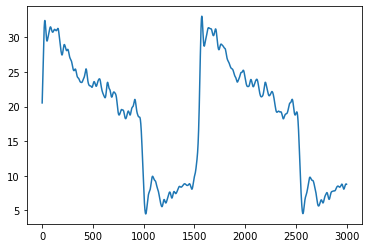

In [28]:
plt.plot(hffm.loc[601,'Gt_kde_psth'])

In [29]:
hffm.to_pickle('/home/niell_lab/Data/freely_moving_ephys/batch_files/062022/hffm_062022_gt.pickle')